In [1]:
import os
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from threading import Thread, Event

In [2]:
class MemoryMonitor(Thread):

    def __init__(self, interval):
        Thread.__init__(self)
        self.daemon = True
        self.interval = interval
        self.process = psutil.Process(os.getpid())
        self.buffer = []
        self.stopped = Event()

    def monitor(self):
        self.buffer.append((time.time(), self.process.memory_info().rss))
        
    def run(self):
        while not self.stopped.wait(self.interval):
            self.monitor()

    def stop(self):
        self.stopped.set()

In [3]:
GB = 1024**3/8
SIZE = int(1.0*GB)

Text(0.5, 1.0, 'Peak=8769802240.0\nElapsed=7.935058832168579')

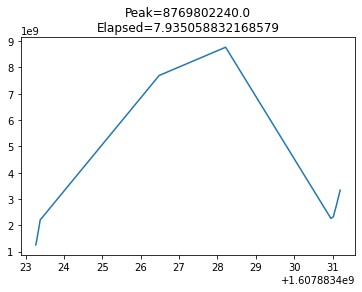

In [4]:
data = np.ones(SIZE, dtype='float64')

monitor = MemoryMonitor(0.01)
monitor.start()
df = pd.DataFrame()
df['MyCol'] = data
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=1190416384.0\nElapsed=0.0')

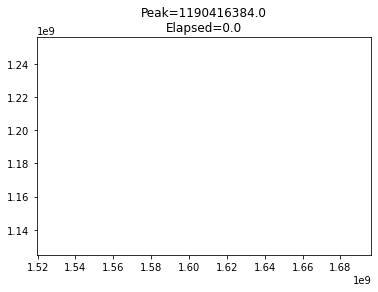

In [5]:
data = np.ones(SIZE, dtype='float64')

monitor = MemoryMonitor(0.01)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3451478016.0\nElapsed=8.88403606414795')

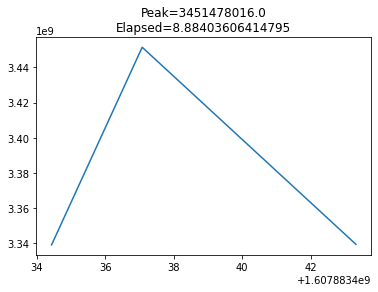

In [6]:
data = [float(1.0)]*SIZE

monitor = MemoryMonitor(0.01)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=1193209856.0\nElapsed=0.0')

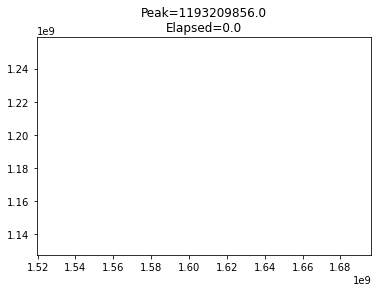

In [7]:
data = np.array([float(1.0)]*SIZE, dtype='float64')

monitor = MemoryMonitor(0.01)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=1194389504.0\nElapsed=0.0')

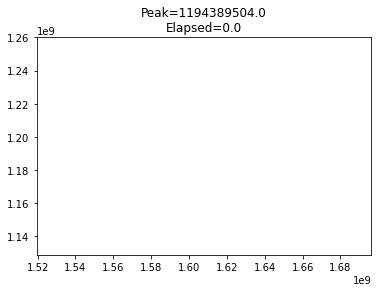

In [8]:
data = np.empty(SIZE, dtype='float64')
data[:] = [float(1.0)]*SIZE

monitor = MemoryMonitor(0.01)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()
time.sleep(1)

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))